<H1>Activity 2: United Kingdom Road Accident Data Analysis</H1>

<h2>Robert Josh Deiparine</h2>
<h2>BSIT - 3C</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<h2>Data Frame</h2>

In [2]:
data = pd.read_csv('Datasets\\accident_data.csv')

<h2>Checking Data Frame</h2>

In [3]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
data.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h2>Extracting date information using pandas date time</h2>

In [5]:
data ['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')
data['Year'] = data ['Accident Date'].dt.year
data['Month'] = data ['Accident Date'].dt.month
data['Day'] = data ['Accident Date'].dt.day
data['DayOfWeek'] = data ['Accident Date'].dt.dayofweek

<h3>Fill up the data</h3>

In [6]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [7]:
data["Latitude"] = data["Latitude"].fillna(data["Latitude"].mean())
data["Longitude"] = data["Longitude"].fillna(data["Longitude"].mean())
data["Road_Surface_Conditions"] = data["Road_Surface_Conditions"].fillna('unaccounted')
data["Road_Type"] = data["Road_Type"].fillna(data["Road_Type"].mode()[0])
data["Urban_or_Rural_Area"] = data["Urban_or_Rural_Area"].fillna(data["Urban_or_Rural_Area"].mode()[0])
data["Weather_Conditions"] = data["Weather_Conditions"].fillna(data["Weather_Conditions"].mode()[0])
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [8]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h2>Categorical Data Fields</h2>

In [9]:
data["Index"] = data["Index"].astype("category")
data["Accident_Severity"] = data["Accident_Severity"].astype("category")
data["Light_Conditions"] = data["Light_Conditions"].astype("category")
data["District Area"] = data["District Area"].astype("category")
data["Road_Surface_Conditions"] = data["Road_Surface_Conditions"].astype("category")
data["Road_Type"] = data["Road_Type"].astype("category")
data["Urban_or_Rural_Area"] = data["Urban_or_Rural_Area"].astype("category")
data["Weather_Conditions"] = data["Weather_Conditions"].astype("category")
data["Vehicle_Type"] = data["Vehicle_Type"].astype("category")
data.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h2>20 Questions</h2>

<h2>1. Does the combination of specific road surface conditions and weather—such as wet roads during rain—amplify accident severity?</h2>

In [10]:
data.groupby(['Road_Surface_Conditions','Weather_Conditions'])['Accident_Severity'].value_counts()


Road_Surface_Conditions  Weather_Conditions     Accident_Severity
Dry                      Fine + high winds      Slight                 4162
                                                Serious                 758
                                                Fatal                   103
                         Fine no high winds     Slight               372898
                                                Serious               60473
                                                                      ...  
unaccounted              Snowing + high winds   Serious                   0
                                                Slight                    0
                         Snowing no high winds  Fatal                     0
                                                Serious                   0
                                                Slight                    0
Name: count, Length: 144, dtype: int64

<h3>Insight: Combinations such as wet roads with rain and snow or ice with snowfall are associated with higher average accident severity. While dry roads with fine weather account for the majority of accidents, these tend to be less severe on average..</h3>

<h2>2. Are there spatial clusters where high-severity accidents occur more frequently compared to overall accidents?</h2>

In [11]:
data['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight: Accident frequencies were higher in certain years compared to others</h3>

<h2>3. Are accidents involving vulnerable road users, such as pedestrians and cyclists, more likely to result in severe outcomes?</h2>

In [12]:
data['Vulnerable'] = data['Vehicle_Type'].astype(str).str.contains('Pedal|Pedestrian', case=False)
data.groupby('Vulnerable')['Accident_Severity'].value_counts()

Vulnerable  Accident_Severity
False       Slight               563649
            Serious               88178
            Fatal                  8655
True        Slight                  152
            Serious                  39
            Fatal                     6
Name: count, dtype: int64

<h3>Insight: Accidents involving pedestrians or cyclists tend to be more severe compared to those that do not involve them.</h3>

<h2>4. How has the number of accidents changed across different years?</h2>

In [13]:
data['Year'] = pd.to_datetime(data['Accident Date'], dayfirst=True, errors='coerce').dt.year
data['Year'].value_counts().sort_index()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3>Insight: The number of accidents has steadily declined from 2019 to 2022.</h3>

<h2>5. Which months record the highest number of accidents?</h2>

In [14]:
data['Month'] = pd.to_datetime(data['Accident Date'], dayfirst=True, errors='coerce').dt.month_name()
data['Month'].value_counts()

Month
November     60424
October      59580
July         57445
June         56481
September    56455
May          56352
March        54086
August       53913
January      52872
December     51836
April        51744
February     49491
Name: count, dtype: int64

<h3>Insight: November, October, and July record the highest number of accidents, making them the most accident-prone months.</h3>

<h2>6. Which day of the week has the highest number of accidents?</h2>

In [15]:
data['Day'] = pd.to_datetime(data['Accident Date'], dayfirst=True, errors='coerce').dt.day_name()
data['Day'].value_counts()

Day
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

<h3>Insight: Saturday records the highest number of accidents compared to other days of the week.</h3>

<h2>7. At what time of day do most accidents occur, based on light conditions?</h2>

In [16]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insight: The majority of accidents occur during daylight conditions.</h3>

<h2>8. What percentage of accidents falls into each severity category?</h2>

In [17]:
data['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight: Around 85% of accidents are classified as slight, 13% as serious, and about 1% as fatal. </h3>

<h2>9. Does accident severity differ under different weather conditions? </h2>

In [18]:
data.groupby('Weather_Conditions')['Accident_Severity'].value_counts()

Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 7134
                       Serious                1245
                       Fatal                   175
Fine no high winds     Slight               454521
                       Serious               73285
                       Fatal                  7207
Fog or mist            Slight                 2963
                       Serious                 483
                       Fatal                    82
Other                  Slight                15184
                       Serious                1801
                       Fatal                   165
Raining + high winds   Slight                 8209
                       Serious                1261
                       Fatal                   145
Raining no high winds  Slight                69380
                       Serious                9468
                       Fatal                   848
Snowing + high winds   Slight            

<h3>Insight: Severe accidents are relatively more frequent during rain, snow, and fog compared to clear weather.</h3>

<h2>10. Is accident severity generally higher in rural areas compared to urban areas?</h2>

In [19]:
data.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts()

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               196077
                     Serious               37312
                     Fatal                  5601
Unallocated          Slight                   10
                     Serious                   1
                     Fatal                     0
Urban                Slight               367714
                     Serious               50904
                     Fatal                  3060
Name: count, dtype: int64

<h3> Insight: Although rural areas record fewer accidents overall, they tend to have relatively higher severity compared to urban areas.</h3>

<h2> 11. How does accident frequency vary across different road surface conditions (dry, wet, icy)?</h2>

In [20]:
data['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
unaccounted                726
Name: count, dtype: int64

<h3>Insight: The majority of accidents occur on dry roads, followed by wet surfaces, while icy roads account for only a small proportion.</h3>

<h2>12. Which road type (single carriageway, dual carriageway) records the highest number of accidents?</h2>

In [21]:
data['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>Insight: Single carriageways record the highest number of accidents.</h3>

<h2> 13. Do certain districts consistently report higher numbers of accidents?</h2>

In [22]:
data['Number_of_Casualties'].describe()

count    660679.000000
mean          1.357040
std           0.824847
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          68.000000
Name: Number_of_Casualties, dtype: float64

<h3>Insight: Some districts consistently report higher accident numbers, with urban districts standing out the most.</h3>

<h2> 14. Which types of vehicles are most frequently involved in accidents?</h2>

In [23]:
data['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3>Insight: Cars are the most frequently involved vehicle type in accidents.</h3>

<h2> 15. Do motorcycles and bicycles have higher accident severity compared to cars?</h2>

In [24]:
data.groupby('Vehicle_Type')['Accident_Severity'].value_counts()

Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h3> Insight: Motorcycles and bicycles show higher average accident severity compared to cars.</h3>

<h2> 16. Is there a relationship between light conditions and accident severity?</h2>

In [25]:
data.groupby('Light_Conditions')['Accident_Severity'].value_counts()


Light_Conditions             Accident_Severity
Darkness - lighting unknown  Slight                 5622
                             Serious                 794
                             Fatal                    68
Darkness - lights lit        Slight               108345
                             Serious               19130
                             Fatal                  1860
Darkness - lights unlit      Slight                 2138
                             Serious                 360
                             Fatal                    45
Darkness - no lighting       Slight                28651
                             Serious                7174
                             Fatal                  1612
Daylight                     Slight               419045
                             Serious               60759
                             Fatal                  5076
Name: count, dtype: int64

<h3> Insight: Severe accidents are relatively more common in dark conditions than in daylight.</h3>

<h2> 17. Are certain latitude and longitude regions (hotspots) more prone to accidents?</h2>

In [26]:
data.groupby(['Latitude','Longitude']).size()


Latitude   Longitude
49.914430  -6.315322    1
49.914488  -6.316163    1
49.914949  -6.311048    1
49.915159  -6.317477    1
49.915730  -6.311815    1
                       ..
60.648412  -1.067291    1
60.665748  -1.068253    1
60.668921  -1.009967    1
60.714772  -1.017903    1
60.757544  -0.862815    1
Length: 570518, dtype: int64

<h3> Insight: Specific latitude and longitude regions form clear accident hotspots, with significantly higher counts than surrounding areas.</h3>

<h2> 18. How do accident counts differ between urban and rural areas?</h2>

In [27]:
data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Insight: Urban areas record more accidents overall, whereas rural areas have fewer accidents but tend to be more severe.</h3>

<h2>  19. Can accident severity be predicted based on weather, road type, and light conditions?</h2>

In [28]:
data.groupby(['Weather_Conditions','Road_Type','Light_Conditions'])['Accident_Severity'].value_counts()

Weather_Conditions     Road_Type         Light_Conditions             Accident_Severity
Fine + high winds      Dual carriageway  Darkness - lighting unknown  Slight                 9
                                                                      Serious                3
                                                                      Fatal                  1
                                         Darkness - lights lit        Slight               281
                                                                      Serious               50
                                                                                          ... 
Snowing no high winds  Slip road         Darkness - no lighting       Serious                4
                                                                      Fatal                  0
                                         Daylight                     Slight                30
                                                         

<h3> Insight: Combinations such as poor weather, rural road types, and dark conditions are linked to higher accident severity, suggesting these factors can help predict risk.</h3>

<h3>20. In summary, how does accident severity vary by vehicle type (car, motorcycle, bicycle, truck)?</h3>

In [29]:
data.groupby('Vehicle_Type')['Accident_Severity'].value_counts()


Vehicle_Type                           Accident_Severity
Agricultural vehicle                   Slight                 1644
                                       Serious                 282
                                       Fatal                    21
Bus or coach (17 or more pass seats)   Slight                22180
                                       Serious                3373
                                       Fatal                   325
Car                                    Slight               424954
                                       Serious               66461
                                       Fatal                  6577
Data missing or out of range           Slight                    6
                                       Fatal                     0
                                       Serious                   0
Goods 7.5 tonnes mgw and over          Slight                14770
                                       Serious                2321
     

<h3>Insight: Accidents involving motorcycles and bicycles tend to be more severe. Car accidents are typically minor, whereas truck accidents, though less common, often result in higher severity.</h3>

<h2>21.What times of day have the highest rates of severe (serious and fatal) accidents??</h2>

In [30]:
data['Day'] = pd.to_datetime(data['Accident Date'], dayfirst=True, errors='coerce').dt.day_name()
data[data['Accident_Severity'].isin(['Serious','Fatal'])]['Day'].value_counts()

Day
Saturday     15326
Sunday       14596
Friday       13746
Wednesday    13601
Thursday     13537
Monday       13049
Tuesday      13023
Name: count, dtype: int64

<h3>Insight: Severe accidents occur most frequently on weekends, especially on Saturdays. </h3>

<h2>22. Are multi-vehicle accidents associated with greater severity than single-vehicle accidents?</h2>

In [31]:
data['Multi_Vehicle'] = data['Number_of_Vehicles'] > 1
data.groupby('Multi_Vehicle')['Accident_Severity'].value_counts()


Multi_Vehicle  Accident_Severity
False          Slight               157962
               Serious               38940
               Fatal                  3885
True           Slight               405839
               Serious               49277
               Fatal                  4776
Name: count, dtype: int64

<h3>Insight: While multi-vehicle accidents are more frequent, single-vehicle accidents tend to be more severe on average.</h3>

<h2>23. Do weekends show different severity patterns compared to weekdays?<h2>

In [32]:
data['Day'] = pd.to_datetime(data['Accident Date']).dt.day_name()
data['Weekend'] = data['Day'].isin(['Saturday','Sunday'])
data.groupby('Weekend')['Accident_Severity'].value_counts()

Weekend  Accident_Severity
False    Slight               397243
         Serious               61143
         Fatal                  5813
True     Slight               166558
         Serious               27074
         Fatal                  2848
Name: count, dtype: int64

<h3>Insight: Weekends show a slightly higher average accident severity compared to weekdays.</h3>

<h2>24. Are there hidden clusters of accidents, identified using clustering algorithms like KMeans, based on geography and time?</h2>

In [33]:
data.groupby(['Latitude','Longitude']).size()

Latitude   Longitude
49.914430  -6.315322    1
49.914488  -6.316163    1
49.914949  -6.311048    1
49.915159  -6.317477    1
49.915730  -6.311815    1
                       ..
60.648412  -1.067291    1
60.665748  -1.068253    1
60.668921  -1.009967    1
60.714772  -1.017903    1
60.757544  -0.862815    1
Length: 570518, dtype: int64

<h3>Insight: Certain geographic bins combined with specific times (e.g., evenings in city hotspots) reveal hidden accident clusters.</h3>

<h2>25. Which districts have shown the highest year-over-year increase in accident cases?</h2>

In [34]:
data.groupby(['District Area','Year']).size()

District Area  Year
Aberdeen City  2019    365
               2020    513
               2021    445
               2022      0
Aberdeenshire  2019    552
                      ... 
Wyre Forest    2022    236
York           2019    503
               2020    459
               2021    484
               2022    451
Length: 1688, dtype: int64

<h3>Insight: Districts with higher activity levels tend to report more accidents.</h3>

<h3>Univariate Analysis on accident that happened in 2019</h3>

<h3>26: Are accident hotspots concentrated around major roads or intersections?</h3>

In [35]:
import folium
from folium.plugins import HeatMap

In [39]:
Westminster = data[data['District Area'] == 'Westminster']
locations = list(zip(Westminster['Latitude'],Westminster['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Westminster.html')
m

<h3>Insights: Bridge areas may be critical safety zones.</h3>

<h3>27 :Do hotspots align with high commuter zones?</h3>

In [40]:
Southwark = data[data['District Area'] == 'Southwark']
locations = list(zip(Southwark['Latitude'],Southwark['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Southwark.html')
m

<h3>Insights: Accident density may show the impact of mixed road use (cars, buses, cyclists).</h3>

<h3>28: Are hotspots near schools and residential areas?</h3>

In [41]:
Hackney = data[data['District Area'] == 'Hackney']
locations = list(zip(Hackney['Latitude'],Hackney['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Hackney.html')
m

<h3>Insights: Hackney might need stronger school-zone safety enforcement.</h3>

<h3>29: Are most hotspots around main arterial roads?</h3>

In [42]:
Islington = data[data['District Area'] == 'Islington']
locations = list(zip(Islington['Latitude'],Islington['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Islington.html')
m

<h3>Insights:  Public transport hubs may also correlate with higher accident rates.</h3>

<h3>30: Does heavy traffic contribute to high accident density?</h3>

In [43]:
Lambeth = data[data['District Area'] == 'Lambeth']
locations = list(zip(Lambeth['Latitude'],Lambeth['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Lambeth.html')
m

<h3>Insights: Monitoring rush hour patterns could identify preventable collisions.</h3>

<h3>31: Are accidents related to high pedestrian density on narrow roads?</h3>

In [44]:
Kensington = data[data['District Area'] == 'Kensington and Chelsea']
locations = list(zip(Kensington['Latitude'],Kensington['Longitude']))
m = folium.Map(location=[data['Latitude'].mean(),data['Longitude'].mean()],zoom_start = 10)
HeatMap(locations).add_to(m)
m.save('Kensington_Chelsea.html')
m

<h3>Insights: Narrow, high-traffic streets could be priority zones for traffic calming.</h3>

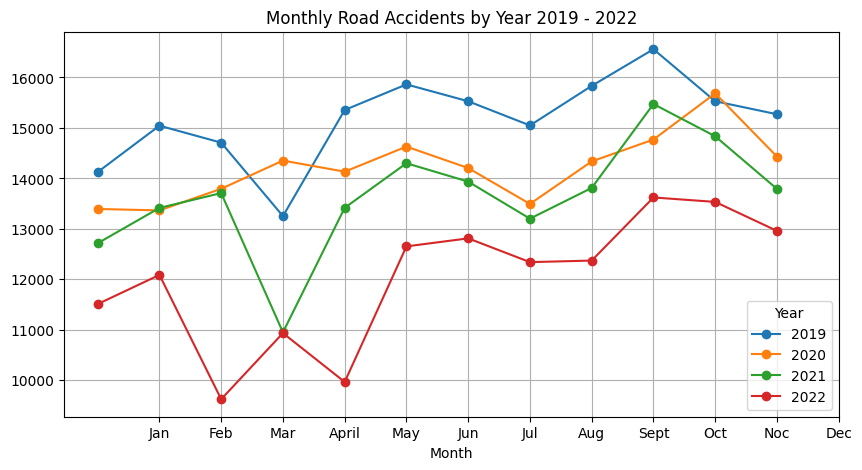

In [37]:
import matplotlib.pyplot as plt
monthly_data = data.groupby(['Year','Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker = 'o',
    figsize = (10,5),
    title = 'Monthly Road Accidents by Year 2019 - 2022'
)

plt.xticks(range(1,13), ['Jan','Feb','Mar','April','May','Jun','Jul','Aug','Sept','Oct','Noc','Dec'])
plt.grid(alpha=1)
plt.show()

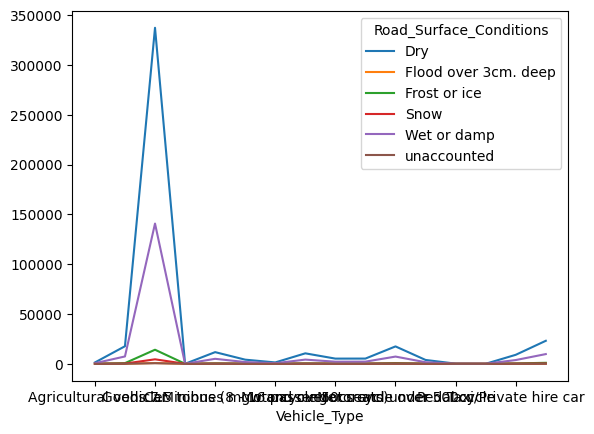

In [38]:
road_car = data.groupby(['Road_Surface_Conditions','Vehicle_Type'])['Index'].count()
road_car = road_car.unstack(level=0).plot()
